In [1]:
import requests
import json
import pandas as pd
import geopandas as gpd

In [2]:
stopslink = "https://developer.cumtd.com/api/v2.2/json/GetStops?key=bc3d6f16852444f888014a01803b3954"
response = requests.get(stopslink)

In [3]:
stop_list = response.json()['stops'] # list of dictionaries of stop info, in each dictionary under 'stop_points' is a list of points included in that stop. these have lat and lon
stop_list[0]['stop_points'] 

[{'code': 'MTD5437',
  'stop_id': '150DALE:1',
  'stop_lat': 40.114512,
  'stop_lon': -88.180673,
  'stop_name': 'U.S. 150 & Dale (NE Corner)'},
 {'code': 'MTD5437',
  'stop_id': '150DALE:3',
  'stop_lat': 40.114503,
  'stop_lon': -88.180848,
  'stop_name': 'U.S. 150 & Dale (South Side)'}]

In [4]:
stop_df = pd.DataFrame(columns=['Stop ID', 'Stop Name', 'Lat', 'Lon', 'Stop Code'])
stop_df

,Stop ID,Stop Name,Lat,Lon,Stop Code


In [5]:
for stop in stop_list:
    stop_points = stop['stop_points']
    for point in stop_points:
        stop_df = stop_df.append({'Stop ID':point['stop_id'], 'Stop Name' : point['stop_name'], 'Lat' : point['stop_lat'], 'Lon' : point['stop_lon'], 'Stop Code' : point['code']}, ignore_index = True)

In [6]:
stop_df.to_csv('CUMTDStops10-19-22.csv')

In [7]:
trips_df = pd.read_csv('CUMTDTrips10-5-22.csv')

In [8]:
trips_df.shape

(7022, 8)

In [9]:
trips_df = trips_df.drop_duplicates(subset=['route_id'])
trips_df.shape

(102, 8)

In [10]:
trips_df

,block_id,route_id,direction_id,trip_headsign,shape_id,service_id,trip_id,original_trip_id
0,b_LN2 MF,LINK,1,Water Survey,[@6.0.15252684@]2,LN2 MF_merged_1703,[@6.0.15252684@][2][1622672028480]/57__LN2_MF_...,[@6.0.15252684@][2][1622672028480]/57__LN2_MF
1,a_SV4 UI NOSCH,SILVER EVENING,0,Lincoln Square,130N SILVER EVENING 1,SV4 UI NOSCH,[@12.0.42224456@][3][1246897172937]/2__SV4_UI_...,NaN
2,a_I2 UI-F,ILLINI,0,Lincoln & Killarney,22N ILLINI 10,I2 UI-F,[@6.0.28930998@][1][1654017581186]/12__I2_UI-F,NaN
3,a_SV4 UI F,SILVER,1,PAR,SILVER 120,SV4 UI F,[@6.0.28932250@][2][1654215235685]/129__SV4_UI_F,NaN
4,a_O4 MF,ORANGE,0,Lincoln Square - US 150 & Dodson,[@2.0.86175868@]ORANGE 12,O4 MF_merged_1589,[@2.0.86175868@][1458585713139]/14__O4_MF_merg...,[@2.0.86175868@][1458585713139]/14__O4_MF
...,...,...,...,...,...,...,...,...
969,b_1N SHOW MTTF,1 YELLOW ALT,0,Harris & Harvard,[@14.0.56289002@]26,1N SHOW MTTF,[@6.0.4561608@][1][1612730147779]/2__1N_SHOW__...,NaN
1044,a_ORANGE_GREEN,5W GREEN ALT 2,0,Fairlawn & Vine,7E ALT 2,ORANGE_GREEN_merged_1551,[@36.0.28512376@][3][1175211427003]/21__ORANGE...,[@36.0.28512376@][3][1175211427003]/21__ORANGE...
1270,b_3S SHOW#1 WED,3S LAVENDER ALT,1,Crescent & John,3S ALT 1,3S SHOW#1 WED,[@36.0.28512104@][2][1175208212394]/2__3S_SHOW...,NaN
1435,b_GNX1 SHOW MTTF,5E GREEN EXPRESS 1 ALT,0,Harris & Harvard,5E EXP 1 ALT,GNX1 SHOW MTTF_merged_1668,[@36.0.28512759@][3][1175211123269]/8__GNX1_SH...,[@36.0.28512759@][3][1175211123269]/8__GNX1_SH...


In [11]:
shapelink = "https://developer.cumtd.com/api/v2.2/json/GetShape?key=bc3d6f16852444f888014a01803b3954"

In [12]:
shapes = []
for idx, row in trips_df.iterrows():
    shape = []
    shape_id = row['shape_id']
    response = requests.get(shapelink, params={'shape_id':shape_id})
    # print(response.json()['shapes'][0])
    for point in response.json()['shapes']:
        lat = point['shape_pt_lat']
        lon = point['shape_pt_lon']
        shape.append((lon, lat))
    shapes.append(shape)
trips_df['shapes'] = shapes

In [13]:
trips_df

,block_id,route_id,direction_id,trip_headsign,shape_id,service_id,trip_id,original_trip_id,shapes
0,b_LN2 MF,LINK,1,Water Survey,[@6.0.15252684@]2,LN2 MF_merged_1703,[@6.0.15252684@][2][1622672028480]/57__LN2_MF_...,[@6.0.15252684@][2][1622672028480]/57__LN2_MF,"[(-88.228952, 40.116187), (-88.228948, 40.1163..."
1,a_SV4 UI NOSCH,SILVER EVENING,0,Lincoln Square,130N SILVER EVENING 1,SV4 UI NOSCH,[@12.0.42224456@][3][1246897172937]/2__SV4_UI_...,NaN,"[(-88.22037, 40.092645), (-88.220354, 40.09259..."
2,a_I2 UI-F,ILLINI,0,Lincoln & Killarney,22N ILLINI 10,I2 UI-F,[@6.0.28930998@][1][1654017581186]/12__I2_UI-F,NaN,"[(-88.220416, 40.099466), (-88.222829, 40.0994..."
3,a_SV4 UI F,SILVER,1,PAR,SILVER 120,SV4 UI F,[@6.0.28932250@][2][1654215235685]/129__SV4_UI_F,NaN,"[(-88.208029, 40.111605), (-88.208929, 40.1115..."
4,a_O4 MF,ORANGE,0,Lincoln Square - US 150 & Dodson,[@2.0.86175868@]ORANGE 12,O4 MF_merged_1589,[@2.0.86175868@][1458585713139]/14__O4_MF_merg...,[@2.0.86175868@][1458585713139]/14__O4_MF,"[(-88.240893, 40.115915), (-88.24105, 40.11550..."
...,...,...,...,...,...,...,...,...,...
969,b_1N SHOW MTTF,1 YELLOW ALT,0,Harris & Harvard,[@14.0.56289002@]26,1N SHOW MTTF,[@6.0.4561608@][1][1612730147779]/2__1N_SHOW__...,NaN,"[(-88.197396, 40.116163), (-88.197379, 40.1163..."
1044,a_ORANGE_GREEN,5W GREEN ALT 2,0,Fairlawn & Vine,7E ALT 2,ORANGE_GREEN_merged_1551,[@36.0.28512376@][3][1175211427003]/21__ORANGE...,[@36.0.28512376@][3][1175211427003]/21__ORANGE...,"[(-88.181411, 40.103297), (-88.181399, 40.1025..."
1270,b_3S SHOW#1 WED,3S LAVENDER ALT,1,Crescent & John,3S ALT 1,3S SHOW#1 WED,[@36.0.28512104@][2][1175208212394]/2__3S_SHOW...,NaN,"[(-88.197396, 40.116163), (-88.197379, 40.1163..."
1435,b_GNX1 SHOW MTTF,5E GREEN EXPRESS 1 ALT,0,Harris & Harvard,5E EXP 1 ALT,GNX1 SHOW MTTF_merged_1668,[@36.0.28512759@][3][1175211123269]/8__GNX1_SH...,[@36.0.28512759@][3][1175211123269]/8__GNX1_SH...,"[(-88.197396, 40.116163), (-88.197379, 40.1163..."


In [14]:
from shapely.geometry import LineString, Point
geometry = trips_df['shapes'].apply(lambda x: LineString(x))

In [15]:
trips_df['geometry'] = geometry

In [16]:
trips_gdf = gpd.GeoDataFrame(trips_df, geometry=geometry)
trips_gdf = trips_gdf.set_crs("EPSG:4326")
print(trips_gdf.crs)
trips_gdf = trips_gdf.drop(columns=['shapes'])

EPSG:4326


In [32]:
route_colors = []
routelink = "https://developer.cumtd.com/api/v2.2/json/GetRoute?key=bc3d6f16852444f888014a01803b3954"
for idx,row in trips_gdf.iterrows():
    route_id = row['route_id']
    rresponse = requests.get(routelink, params={'route_id':route_id})
    #print(rresponse.json()['routes'])
    color = '#' + rresponse.json()['routes'][0]['route_color']
    route_colors.append(color)

In [33]:
print(route_colors)
trips_gdf['color'] = route_colors

['#00ffff', '#cccccc', '#5a1d5a', '#cccccc', '#f99f2a', '#ed1c24', '#5a1d5a', '#5a1d5a', '#006991', '#008063', '#355caa', '#fcee1f', '#008063', '#a78bc0', '#fcee1f', '#cccccc', '#a78bc0', '#5a1d5a', '#5a1d5a', '#008063', '#c7994a', '#006991', '#b2d235', '#fcee1f', '#808285', '#eb008b', '#825622', '#a78bc0', '#006991', '#006991', '#808285', '#a78bc0', '#cccccc', '#eb008b', '#cccccc', '#008063', '#eb008b', '#c7994a', '#808285', '#fcee1f', '#008063', '#cccccc', '#008063', '#5a1d5a', '#008063', '#b2d235', '#5a1d5a', '#006991', '#cccccc', '#5a1d5a', '#808285', '#000000', '#cccccc', '#5a1d5a', '#008063', '#ed1c24', '#f99f2a', '#fcee1f', '#fcee1f', '#c7994a', '#008063', '#fcee1f', '#fcee1f', '#808285', '#fcee1f', '#006991', '#cccccc', '#008063', '#825622', '#008063', '#006991', '#008063', '#825622', '#006991', '#eb008b', '#cccccc', '#cccccc', '#808285', '#008063', '#ffbfff', '#b2d235', '#9e8966', '#ffc0ff', '#008063', '#2b3088', '#eb008b', '#fcee1f', '#c7994a', '#b2d235', '#008063', '#fcee1f'

<AxesSubplot:>

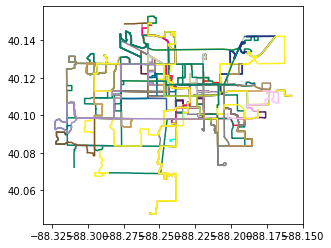

In [34]:
trips_gdf.plot(color = trips_gdf['color'])

In [35]:
stops_geometry = []
for idx,row in stop_df.iterrows():
    lon = row['Lon']
    lat = row['Lat']
    stops_geometry.append(Point((lon, lat)))
stops_gdf = gpd.GeoDataFrame(stop_df, geometry=stops_geometry)
stops_gdf = stops_gdf.set_crs("EPSG:4326")

<AxesSubplot:>

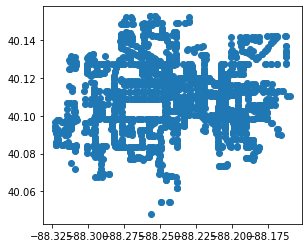

In [36]:
stops_gdf.plot()

In [37]:
stops_gdf.to_file('stops/CUMTD_Stops.shp')
trips_gdf.to_file('routes/CUMTD_Routes.shp')

/tmp/ipykernel_300/1178254454.py:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  trips_gdf.to_file('routes/CUMTD_Routes.shp')
